In [169]:
import sqlite3
import pandas as pd

In [170]:
housing_database_connect = sqlite3.connect("housing.db")
housing_df = pd.read_sql("SELECT * FROM houses",housing_database_connect)
housing_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,2217,909279080,50,RL,NaN,11275,Pave,None,IR1,HLS,...,0,None,None,None,0,3,2007,WD,Normal,220000
1,837,907126050,20,RL,65.0,9757,Pave,None,Reg,Low,...,0,None,None,None,0,10,2009,WD,Normal,143000
2,2397,528144030,60,RL,86.0,11065,Pave,None,IR1,Lvl,...,0,None,None,None,0,10,2006,New,Partial,281000
3,1963,535452060,20,RL,70.0,7000,Pave,None,Reg,Lvl,...,0,None,MnWw,None,0,4,2007,WD,Family,135000
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,None,None,None,0,1,2010,WD,Abnorml,102776


In [172]:
normal_df = housing_df[housing_df['Sale Condition']=='Normal']
column_names = ['Year Built','Gr Liv Area','Total Bsmt SF','SalePrice']
subset = normal_df[column_names]
subset_df = pd.DataFrame(subset)
subset_df_clean = subset_df.dropna()
house_age = 2010 - subset_df_clean['Year Built']
subset_df_clean['Age'] = house_age

In [173]:
price_correlation = subset_df_clean.corr()['SalePrice'].abs().sort_values()
price_correlation

Age              0.520716
Year Built       0.520716
Total Bsmt SF    0.635165
Gr Liv Area      0.740554
SalePrice        1.000000
Name: SalePrice, dtype: float64

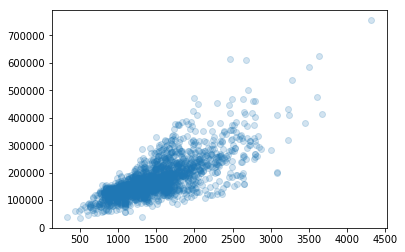

In [174]:
import matplotlib.pyplot as plt
y = subset_df_clean['SalePrice']
x = subset_df_clean['Gr Liv Area']
fig = plt.figure()
plt.scatter(x,y,alpha=0.2)
plt.show()

In [175]:
# model without intercept
import statsmodels.api as sm
y = subset_df_clean['SalePrice']
x = subset_df_clean[['Gr Liv Area','Total Bsmt SF']]
model_without_intercept = sm.OLS(y, x)
results_without_intercept = model_without_intercept.fit()
print(results_without_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.035e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        03:41:17   Log-Likelihood:                -23183.
No. Observations:                1928   AIC:                         4.637e+04
Df Residuals:                    1926   BIC:                         4.638e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Gr Liv Area      76.0048      1.592     47.737

In [176]:
# model with intercept
import statsmodels.api as sm
x_with_intercept = sm.add_constant(x, prepend=True)
x_with_intercept.head()
model_with_intercept = sm.OLS(y, x_with_intercept)
results_with_intercept = model_with_intercept.fit()
print(results_with_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2117.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        03:41:17   Log-Likelihood:                -23156.
No. Observations:                1928   AIC:                         4.632e+04
Df Residuals:                    1925   BIC:                         4.634e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.348e+04   3198.698     -7.342

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [177]:
# Question 2 C  for model 1  RMS

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted1 = results_without_intercept.predict(x) #predict y


rms = sqrt(mean_squared_error(y, y_predicted1))
print(round(rms,3))

40353.738


In [178]:
# C for model 2 RMS
y_predicted2 = results_with_intercept.predict(x_with_intercept) #predict y

rms = sqrt(mean_squared_error(y, y_predicted2))
print(round(rms,3))

39800.385


In [179]:
# C for model 1 R squared
from sklearn.metrics import r2_score
r2 = r2_score(y, y_predicted1)
print(round(r2,3))
# C for model 1 R squared
r2 = r2_score(y, y_predicted2)
print(round(r2,3))


0.679
0.687


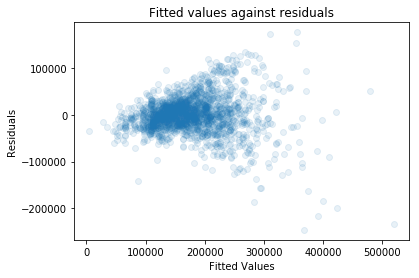

In [180]:
fitted_values = y_predicted2
residual1 = y_predicted2 - y
plt.scatter(fitted_values,residual1, alpha = 0.1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted values against residuals")
plt.show()


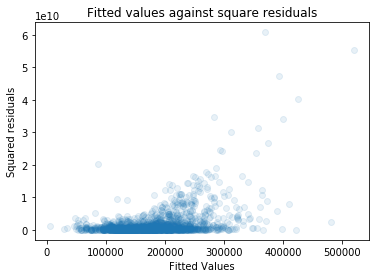

In [181]:
fitted_values = y_predicted2
residual1 = y_predicted2 - y
residual2 = residual1**2        #square redsiduals
plt.scatter(fitted_values,residual2, alpha = 0.1)
plt.xlabel("Fitted Values")
plt.ylabel("Squared residuals")
plt.title("Fitted values against square residuals")# violation of constant variance assumption
plt.show()
